In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path

import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "retinal"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plots
Lg_plot_jpg = data_subfolder + "_Figure_3.jpg"
Sg_plot_jpg = data_subfolder + "_Figure_5.jpg"

# input data
nru_dict_pkl =  "nru_dict.pkl"
scanpy_variance_pkl = "residual_variance_scanpy.pkl"
SCT_variance_pkl = "SCT_v2_residual_variance.pkl"


# paths: output plots
Lg_plot_dsn = data_path / Lg_plot_jpg
Sg_plot_dsn = data_path / Sg_plot_jpg

# paths: input data
nru_dict_dsn = data_path / nru_dict_pkl
scanpy_variance_dsn = data_path / scanpy_variance_pkl
SCT_variance_dsn = data_path / SCT_variance_pkl

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]	

bins_500 = [ 0, 20, 50, 100, 200, 500, 1e6]
labels_500 = ['1-20', '21-50', '51-100', '101-200', '201-500', '501+']

In [5]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]
df_gene_stats.insert ( 3, 'rank_A_g', df_gene_stats['A_g'].rank ( ascending=False ) )

print ( '\n\n df_gene_stats'  )
print ( df_gene_stats  )
print ( '\n\n df_gene_stats.describe' )
print ( df_gene_stats.describe ( percentiles=pctl_list ) )



 df_gene_stats
               nz_cells        M_g        A_g  rank_A_g
CARTPT              812  50.106662  42.740254       1.0
RGS5                417  21.950167  17.483289       2.0
RHO               21812  15.911165  15.539177       3.0
APOE               2255  16.349967  14.865133       4.0
GLUL               4792  15.349501  14.769975       5.0
...                 ...        ...        ...       ...
RTN4R                55   0.553451   0.337634   13547.5
GM25749              60   0.425641   0.337634   13547.5
KIF26B               51   0.504799   0.337634   13547.5
A330033J07RIK        61   0.337634   0.337634   13547.5
RHOV                 51   0.390722   0.337634   13547.5

[13552 rows x 4 columns]


 df_gene_stats.describe
           nz_cells           M_g           A_g      rank_A_g
count  13552.000000  13552.000000  13552.000000  13552.000000
mean    1432.739227      1.227973      1.077509   6776.500000
std     2034.851213      1.043076      0.700579   3912.269758
min       5

In [6]:
df_Lg = pd.read_pickle ( scanpy_variance_dsn ).rename( columns={'CLIPPED':'L_g'} )
df_Lg.insert ( 2, 'rank_L_g', df_Lg['L_g'].rank ( ascending=False ) )
df_Lg.insert ( 3, 'clipping_effect', ( ~ ( df_Lg['L_g'] == df_Lg['UNCLIPPED'] ) ).astype(int) )

print ( '\n\n df_Lg'  )
print ( df_Lg  )
print ( '\n\n df_Lg.describe' )
print ( df_Lg.describe ( percentiles=pctl_list ) )

print (  '\n\n df_Lg[clipping_effect].sum() \n\n', df_Lg['clipping_effect'].sum()  )



 df_Lg
                     L_g  UNCLIPPED  rank_L_g  clipping_effect
CARTPT         44.270155  49.332877       1.0                1
RGS5           20.431153  21.796726       2.0                1
RHO            12.699057  12.699057       8.0                0
APOE           16.193743  16.193743       4.0                0
GLUL           15.138930  15.138930       5.0                0
...                  ...        ...       ...              ...
RTN4R           0.553089   0.553089   13515.0                0
GM25749         0.425352   0.425352   13550.0                0
KIF26B          0.504509   0.504509   13537.0                0
A330033J07RIK   0.337237   0.337237   13552.0                0
RHOV            0.390322   0.390322   13551.0                0

[13552 rows x 4 columns]


 df_Lg.describe
                L_g     UNCLIPPED      rank_L_g  clipping_effect
count  13552.000000  13552.000000  13552.000000     13552.000000
mean       1.215406      1.223827   6776.500000         0.001

In [7]:
df_Sg = pd.read_pickle ( SCT_variance_dsn ).rename( columns={'residual_variance':'S_g'} )
df_Sg.insert ( 1, 'rank_S_g', df_Sg['S_g'].rank ( ascending=False ) )

print ( '\n\n df_Sg'  )
print ( df_Sg  )
print ( '\n\n df_Sg.describe' )
print ( df_Sg.describe ( percentiles=pctl_list ) )



 df_Sg
                     S_g  rank_S_g
CARTPT         78.880323       1.0
RGS5           49.424522       2.0
RHO             1.112457    1537.0
APOE           34.372010       3.0
GLUL           24.736728       4.0
...                  ...       ...
RTN4R           0.048592   13550.0
GM25749         0.060610   13461.0
KIF26B          0.062823   13428.0
A330033J07RIK   0.058539   13487.0
RHOV            0.064183   13406.0

[13552 rows x 2 columns]


 df_Sg.describe
                S_g      rank_S_g
count  13552.000000  13552.000000
mean       0.713609   6776.500000
std        1.170015   3912.269759
min        0.046679      1.000000
1%         0.063716    136.510000
5%         0.095172    678.550000
10%        0.136407   1356.100000
25%        0.325440   3388.750000
50%        0.648638   6776.500000
75%        0.920740  10164.250000
90%        1.142455  12196.900000
95%        1.318769  12874.450000
99%        2.406136  13416.490000
max       78.880323  13552.000000


In [8]:
df_compare_Lg = pd.concat ( [ df_gene_stats, df_Lg], axis=1, sort=False )
df_compare_Lg.insert ( 8, '_rank_A_g_', pd.cut ( df_compare_Lg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Lg.insert ( 9, '_rank_L_g_', pd.cut ( df_compare_Lg['rank_L_g'], bins_500, labels=labels_500 ) )

pd.set_option('display.max_columns', 9)
print ( '\n\n df_compare_Lg'  )
print ( df_compare_Lg  )
print ( '\n\n df_compare_Lg.describe' )
print ( df_compare_Lg.describe ( percentiles=pctl_list ) )

pti_Lg = pv_table_noprint_margins ( df_compare_Lg, '_rank_A_g_', '_rank_L_g_' )
print ( '\n\n Table \n relation between ranks of Ag and Lg\n' )
print ( pti_Lg )



 df_compare_Lg
               nz_cells        M_g        A_g  rank_A_g  ...  rank_L_g  \
CARTPT              812  50.106662  42.740254       1.0  ...       1.0   
RGS5                417  21.950167  17.483289       2.0  ...       2.0   
RHO               21812  15.911165  15.539177       3.0  ...       8.0   
APOE               2255  16.349967  14.865133       4.0  ...       4.0   
GLUL               4792  15.349501  14.769975       5.0  ...       5.0   
...                 ...        ...        ...       ...  ...       ...   
RTN4R                55   0.553451   0.337634   13547.5  ...   13515.0   
GM25749              60   0.425641   0.337634   13547.5  ...   13550.0   
KIF26B               51   0.504799   0.337634   13547.5  ...   13537.0   
A330033J07RIK        61   0.337634   0.337634   13547.5  ...   13552.0   
RHOV                 51   0.390722   0.337634   13547.5  ...   13551.0   

               clipping_effect  _rank_A_g_  _rank_L_g_  
CARTPT                       1       

In [9]:
df_compare_Sg = pd.concat ( [ df_gene_stats, df_Sg], axis=1, sort=False )
df_compare_Sg.insert ( 6, '_rank_A_g_', pd.cut ( df_compare_Sg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Sg.insert ( 7, '_rank_S_g_', pd.cut ( df_compare_Sg['rank_S_g'], bins_500, labels=labels_500 ) )

print ( '\n\n df_compare_Sg'  )
print ( df_compare_Sg  )
print ( '\n\n df_compare_Sg.describe' )
print ( df_compare_Sg.describe ( percentiles=pctl_list ) )

pti_Sg = pv_table_noprint_margins ( df_compare_Sg, '_rank_A_g_', '_rank_S_g_' )
print ( '\n\n Table \n relation between ranks of Ag and Sg\n' )
print ( pti_Sg )



 df_compare_Sg
               nz_cells        M_g        A_g  rank_A_g        S_g  rank_S_g  \
CARTPT              812  50.106662  42.740254       1.0  78.880323       1.0   
RGS5                417  21.950167  17.483289       2.0  49.424522       2.0   
RHO               21812  15.911165  15.539177       3.0   1.112457    1537.0   
APOE               2255  16.349967  14.865133       4.0  34.372010       3.0   
GLUL               4792  15.349501  14.769975       5.0  24.736728       4.0   
...                 ...        ...        ...       ...        ...       ...   
RTN4R                55   0.553451   0.337634   13547.5   0.048592   13550.0   
GM25749              60   0.425641   0.337634   13547.5   0.060610   13461.0   
KIF26B               51   0.504799   0.337634   13547.5   0.062823   13428.0   
A330033J07RIK        61   0.337634   0.337634   13547.5   0.058539   13487.0   
RHOV                 51   0.390722   0.337634   13547.5   0.064183   13406.0   

              _rank_A_

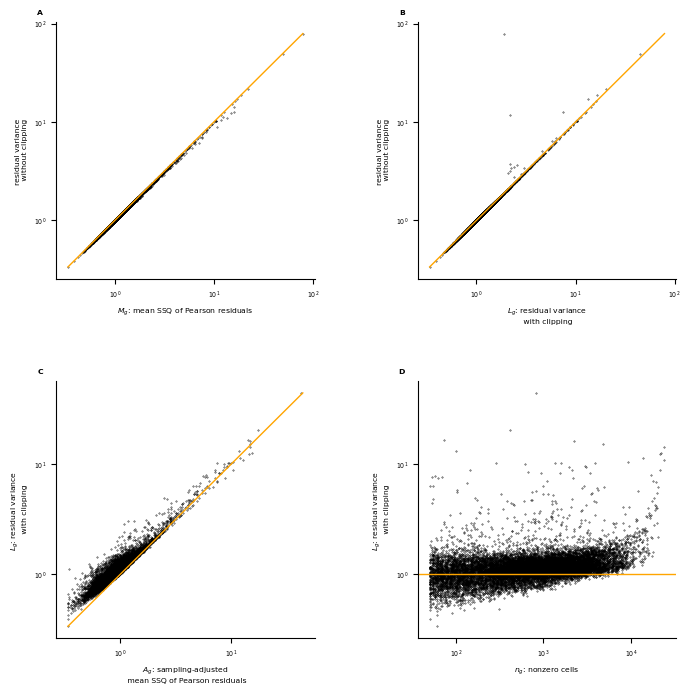

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )

plot_ax ( df_compare_Lg, ax1, 'A', 'M_g', 'UNCLIPPED','$M_g$: mean SSQ of Pearson residuals',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax2, 'B', 'L_g', 'UNCLIPPED','$L_g$: residual variance \n with clipping',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax3, 'C', 'A_g', 'L_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$L_g$: residual variance \n with clipping' )
plot_ax ( df_compare_Lg, ax4, 'D', 'nz_cells', 'L_g', '$n_g$: nonzero cells',  '$L_g$: residual variance \n with clipping', line_slope='horizontal' )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( Lg_plot_dsn, transparent=True, dpi=300 ) 

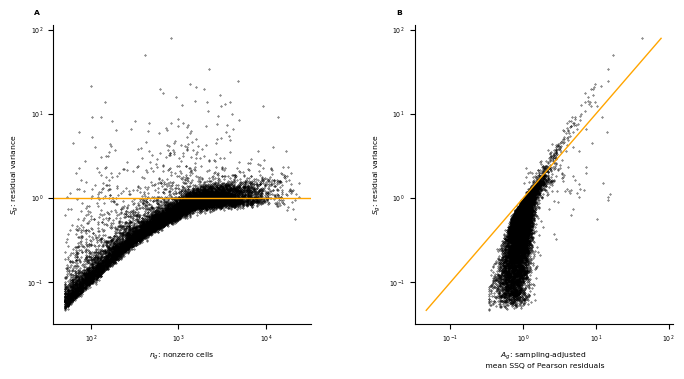

In [11]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=( 8., 4.4 ) )

plot_ax ( df_compare_Sg, ax1, 'A',  'nz_cells', 'S_g', '$n_g$: nonzero cells',   '$S_g$: residual variance', line_slope='horizontal'  )
plot_ax ( df_compare_Sg, ax2, 'B', 'A_g', 'S_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$S_g$: residual variance'  )

plt.subplots_adjust( bottom=0.2, wspace=0.4 )

plt.savefig( Sg_plot_dsn, transparent=True, dpi=300 ) 